In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd drive/MyDrive/Assignments

/content/drive/MyDrive/Assignments


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules

In [5]:
book=pd.read_csv("book.csv")
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [7]:
book.shape

(2000, 11)

In [9]:
for i in book.columns:
  print(i)
  print(book[i].value_counts())
  print()

ChildBks
0    1154
1     846
Name: ChildBks, dtype: int64

YouthBks
0    1505
1     495
Name: YouthBks, dtype: int64

CookBks
0    1138
1     862
Name: CookBks, dtype: int64

DoItYBks
0    1436
1     564
Name: DoItYBks, dtype: int64

RefBks
0    1571
1     429
Name: RefBks, dtype: int64

ArtBks
0    1518
1     482
Name: ArtBks, dtype: int64

GeogBks
0    1448
1     552
Name: GeogBks, dtype: int64

ItalCook
0    1773
1     227
Name: ItalCook, dtype: int64

ItalAtlas
0    1926
1      74
Name: ItalAtlas, dtype: int64

ItalArt
0    1903
1      97
Name: ItalArt, dtype: int64

Florence
0    1783
1     217
Name: Florence, dtype: int64



In [88]:
#creating cross category with support 10%
frequent_itemsets=apriori(book,min_support=0.1,use_colnames=True)
frequent_itemsets.head()

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)


In [22]:
#creating rules for confidenece of 70%

rules=association_rules(frequent_itemsets,metric="lift",min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
95,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
96,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
97,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237
98,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800


In [23]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
95,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
96,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
97,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237
98,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800


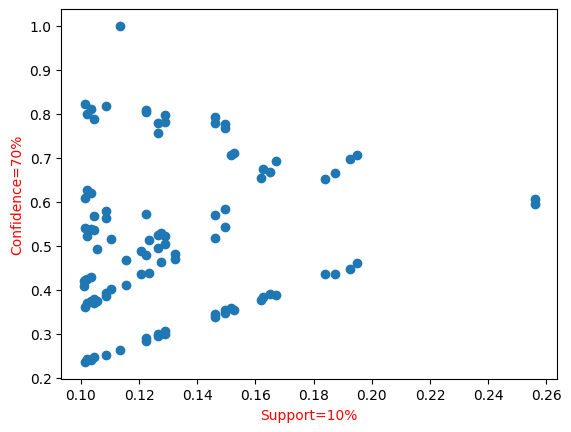

In [47]:
#plotting
plt.scatter(rules["support"],rules["confidence"])
plt.xlabel("Support=10%",color="red",size=10)
plt.ylabel("Confidence=70%",color="red",size=10)
plt.show()

Asscociation rile with support 20% and confidence=80%

In [55]:
#Support=20%
frequest_itemsets_2=apriori(book,min_support=0.2,use_colnames=True)
frequest_itemsets_2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(ChildBks, CookBks)"


In [56]:
#confidence=80%
rules2=association_rules(frequest_itemsets_2,metric="lift",min_threshold=0.8)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


In [57]:
rules2[rules.lift>1]

<ipython-input-57-ebf6069279d4>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rules2[rules.lift>1]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


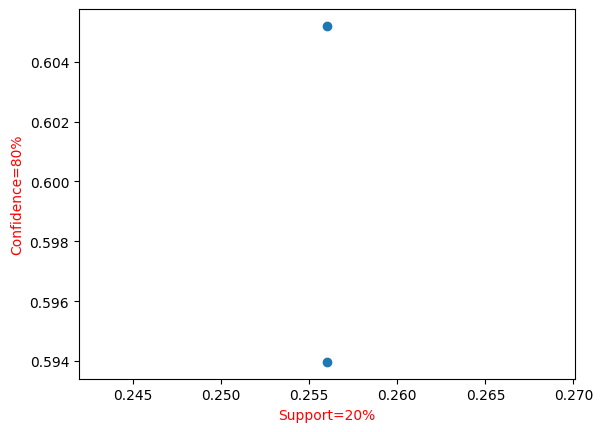

In [58]:
#plotting graph
plt.scatter(rules2["support"],rules2["confidence"])
plt.xlabel("Support=20%",size=10,color="red")
plt.ylabel("Confidence=80%",size=10,color="red")
plt.show()

Association rule for support=5% and confidence=90%

In [59]:
#Creating itemsets with support 5%
frequent_itemsets_3=apriori(book,min_support=0.05,use_colnames=True)
frequent_itemsets_3

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(CookBks, DoItYBks, YouthBks, GeogBks)"
96,0.0560,"(CookBks, GeogBks, YouthBks, ArtBks)"
97,0.0650,"(CookBks, DoItYBks, ArtBks, GeogBks)"
98,0.0510,"(ChildBks, GeogBks, CookBks, YouthBks, DoItYBks)"


In [60]:
rules3=association_rules(frequent_itemsets_3,metric="lift",min_threshold=0.9)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
657,(ChildBks),"(CookBks, GeogBks, DoItYBks, ArtBks)",0.4230,0.0650,0.0535,0.126478,1.945808,0.026005,1.070379
658,(CookBks),"(ChildBks, GeogBks, DoItYBks, ArtBks)",0.4310,0.0595,0.0535,0.124130,2.086217,0.027856,1.073789
659,(GeogBks),"(ChildBks, DoItYBks, ArtBks, CookBks)",0.2760,0.0820,0.0535,0.193841,2.363910,0.030868,1.138733
660,(DoItYBks),"(ChildBks, GeogBks, ArtBks, CookBks)",0.2820,0.0835,0.0535,0.189716,2.272052,0.029953,1.131085


In [61]:
rules3[rules3.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
657,(ChildBks),"(CookBks, GeogBks, DoItYBks, ArtBks)",0.4230,0.0650,0.0535,0.126478,1.945808,0.026005,1.070379
658,(CookBks),"(ChildBks, GeogBks, DoItYBks, ArtBks)",0.4310,0.0595,0.0535,0.124130,2.086217,0.027856,1.073789
659,(GeogBks),"(ChildBks, DoItYBks, ArtBks, CookBks)",0.2760,0.0820,0.0535,0.193841,2.363910,0.030868,1.138733
660,(DoItYBks),"(ChildBks, GeogBks, ArtBks, CookBks)",0.2820,0.0835,0.0535,0.189716,2.272052,0.029953,1.131085


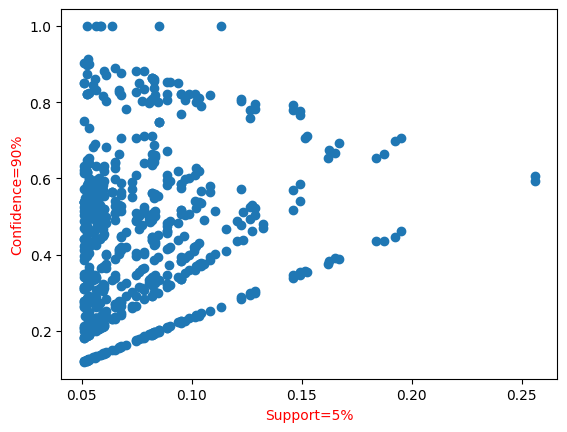

In [62]:
#plotting the graphs
plt.scatter(rules3["support"],rules3["confidence"])
plt.xlabel("Support=5%",size=10,color="red")
plt.ylabel("Confidence=90%",size=10,color="red")
plt.show()

Probem 2

In [95]:
movies=pd.read_csv("my_movies.csv")
movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [64]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [65]:
movies1=movies.iloc[:,5:]
movies1

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


Association rule with support=10% and confidence=70%

In [96]:
#support=10%
frequent_itemsets_movies1=apriori(movies1,min_support=0.1,use_colnames=True)
frequent_itemsets_movies1.head()

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)


In [69]:
#confidence=70%
rules_movies_1=association_rules(frequent_itemsets_movies1,metric="lift",min_threshold=0.7)
rules_movies_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
...,...,...,...,...,...,...,...,...,...
245,(LOTR2),"(Harry Potter1, Green Mile, Sixth Sense, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
246,(Green Mile),"(Harry Potter1, Sixth Sense, LOTR1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
247,(Sixth Sense),"(Harry Potter1, Green Mile, LOTR1, LOTR2)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
248,(LOTR1),"(Harry Potter1, Green Mile, Sixth Sense, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


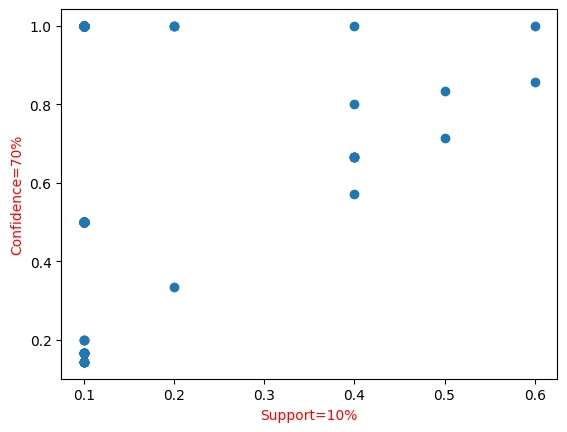

In [90]:
#plotting
plt.scatter(rules_movies_1["support"],rules_movies_1["confidence"])
plt.xlabel("Support=10%",size=10,color="red")
plt.ylabel("Confidence=70%",size=10,color="red")
plt.show()

In [89]:
rules_movies_1[rules_movies_1.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
6,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
245,(LOTR2),"(Harry Potter1, Green Mile, Sixth Sense, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
246,(Green Mile),"(Harry Potter1, Sixth Sense, LOTR1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
247,(Sixth Sense),"(Harry Potter1, Green Mile, LOTR1, LOTR2)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
248,(LOTR1),"(Harry Potter1, Green Mile, Sixth Sense, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


Association rule for support=20% and confidence=80%

In [74]:
#Support=20%
frequent_itemsets_movies2=apriori(movies1,min_support=0.2,use_colnames=True)
frequent_itemsets_movies2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Patriot, Sixth Sense)"
9,0.2,"(Green Mile, Sixth Sense)"


In [81]:
#Confidence=80%
rules_movies2=association_rules(frequent_itemsets_movies2,metric="lift",min_threshold=0.8)
rules_movies2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


In [91]:
rules_movies2[rules_movies2.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


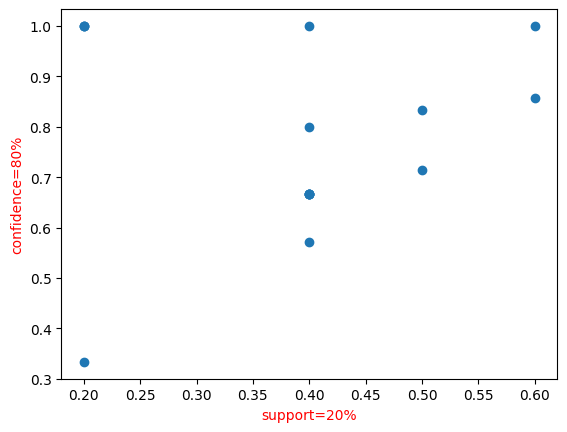

In [92]:
#plotting
plt.scatter(rules_movies2["support"],rules_movies2["confidence"])
plt.xlabel("support=20%",size=10,color="red")
plt.ylabel("confidence=80%",size=10,color="red")
plt.show()

Association rule with support=30% and confidence=90%

In [83]:
#Support=30%
frequent_itemsets_movies3=apriori(movies1,min_support=0.3,use_colnames=True)
frequent_itemsets_movies3

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Gladiator, Sixth Sense)"
4,0.4,"(Patriot, Sixth Sense)"
5,0.6,"(Patriot, Gladiator)"
6,0.4,"(Patriot, Gladiator, Sixth Sense)"


In [84]:
#confidence=90%
rules_movies3=association_rules(frequent_itemsets_movies3,metric="lift",min_threshold=0.9)
rules_movies3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,"(Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
7,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
8,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
9,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5


In [93]:
rules_movies3[rules_movies3.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,"(Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
7,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
8,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
9,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5


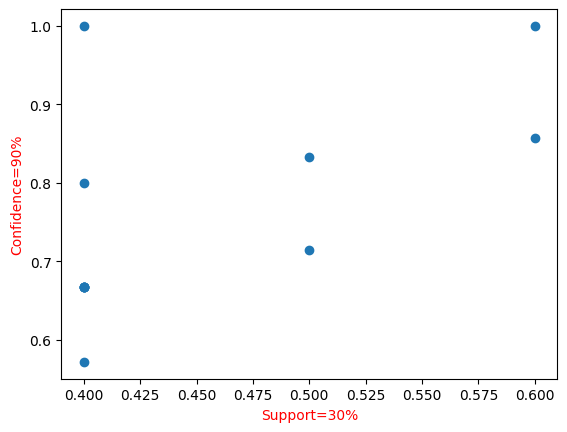

In [94]:
#plotting
plt.scatter(rules_movies3["support"],rules_movies3["confidence"])
plt.xlabel("Support=30%",size=10,color="red")
plt.ylabel("Confidence=90%",size=10,color="red")
plt.show()